In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt


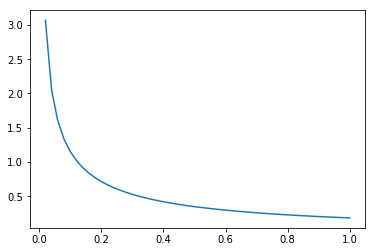

In [11]:
def rho(h, alpha=1.0, x_0=0.5):
    # Weibull distribution
    return alpha/x_0*(h/x_0)**(alpha-1) * np.exp( -(h/x_0)**alpha )
    

h = np.linspace(0.0, 1.0, num=50)[1::]  # exclude the first because it can diverge
rho = rho(h, alpha=0.5, x_0=1.0)
plt.plot(h, rho)
    
    

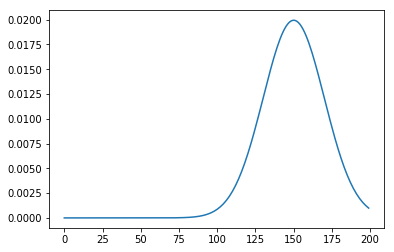

In [15]:
def p_kappa(x):
    # normal distribution (for now)
    mean = 150.0
    sigma = 20.0
    return 1.0/math.sqrt(2.0*math.pi*sigma**2) * np.exp( -(x-mean)**2/(2.0*sigma**2) )

kappa = np.arange(0, 200)
p_k = p_kappa(kappa)
plt.plot(kappa,p_k)

In [16]:
def propagator(k, h, kappa):
    # g(k|h,kappa)
    pass

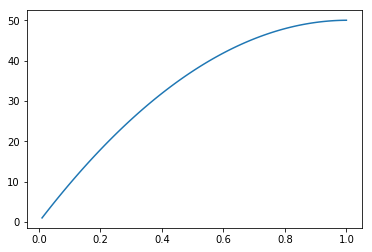

In [40]:
def r(h1, h2):
    # generalized mean
    return np.minimum(h1,h2)

def r_bar_h(h, h_min=0.0, h_max=1.0, num=100):
    # sum_{h'} rho(h') r(h,h')
    h_prime = np.linspace(h_min, h_max, num)[1::].transpose()
    h_prime = h_prime.reshape( [1,h_prime.shape[0]] )
    #print(h,h_prime)
    dr = r(h.reshape([h.shape[0],1]), h_prime)
    #print(dr)
    return np.sum(dr,axis=1)
    
    
h = np.linspace(0.0, 1.0, num=100)[1::]
r_bar = r_bar_h(h)
plt.plot(h, r_bar)

In [ ]:
def propagator(k, h, kappa):
    # g(k|h,kappa) = \binom(kappa, k) r(h)^k ( 1-r(h))^{kappa-k}
    
    pass